In [1]:
import hamiltonian as hm
from matplotlib.pyplot import matshow
from scipy.sparse import linalg
from scipy import sparse as ssp 
from scipy.special import comb
import matplotlib.pyplot as plt

In [15]:
L = 14
J1 = -1
J2 = 1.1
W= 5.
fields1 = np.random.uniform((-W, W), L)
fields2 = np.random.uniform((-W, W), L)
rnd1 = [[w, i] for i, w in enumerate(fields1)]
rnd2 = [[w, i] for i, w in enumerate(fields2)]
nn_xy = [[J1, i, (i + 1) % L ] for i in range(L)]
nn_z = [[J2, i, (i + 1) % L  ] for i in range(L)]
snn_xy = [[J1, i, (i + 2) % L ] for i in range(L)]
snn_z = [[J2, i, (i + 2) % L] for i in range(L)]

static1 = [['+-', nn_xy], ['-+', nn_xy], ['zz', nn_z],
          ['+-', snn_xy], ['-+', snn_xy], ['zz', snn_z], ['z', rnd1]]

static2 = [['+-', nn_xy], ['-+', nn_xy], ['zz', nn_z],
          ['+-', snn_xy], ['-+', snn_xy], ['zz', snn_z], ['z', rnd2]]

ham1 = hm.hamiltonian(L, static1, [])
ham2 = hm.hamiltonian(L, static2, [])

In [16]:
import ctypes 
	
mkl_rt=ctypes.CDLL('libmkl_rt.so')

def mkl_set_num_threads(cores):
	#Set # of MKL threads
	mkl_rt.MKL_Set_Num_Threads(cores)

def mkl_get_max_threads():
	# # of used MKL threads
	print(mkl_rt.MKL_Get_Max_Threads())
    
mkl_set_num_threads(8)



In [ ]:
%%time
eigvals, eigvecs = np.linalg.eigh(ham2.ham.todense())

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!


In [141]:

nu = ham1.L/2
states = []
for i in range(ham1.num_states):
    
    if bin(i).count("1") == nu:
        
        states.append(i)
        
print(len(states))

ham_sector1 = ham1.ham[np.ix_(states, states)]
ham_sector2 = ham2.ham[np.ix_(states, states)]

3432


CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 18.4 µs


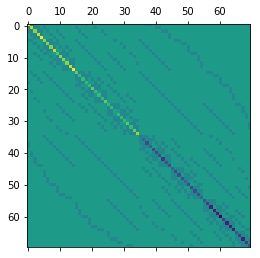

In [11]:
%time
matshow(np.real(ham_sector2.todense()))

In [142]:
%%time
eig2, eigv2 = np.linalg.eigh(ham_sector2.todense())

CPU times: user 39.7 s, sys: 3.22 s, total: 42.9 s
Wall time: 11.4 s


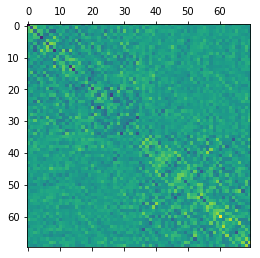

In [13]:
ham1_trans = (eigv2 @ ham_sector1 @ eigv2.H)

matshow(np.real(ham1_trans))

In [18]:
from plotting_tools import plotter_cls as pcls

<IPython.core.display.Javascript object>


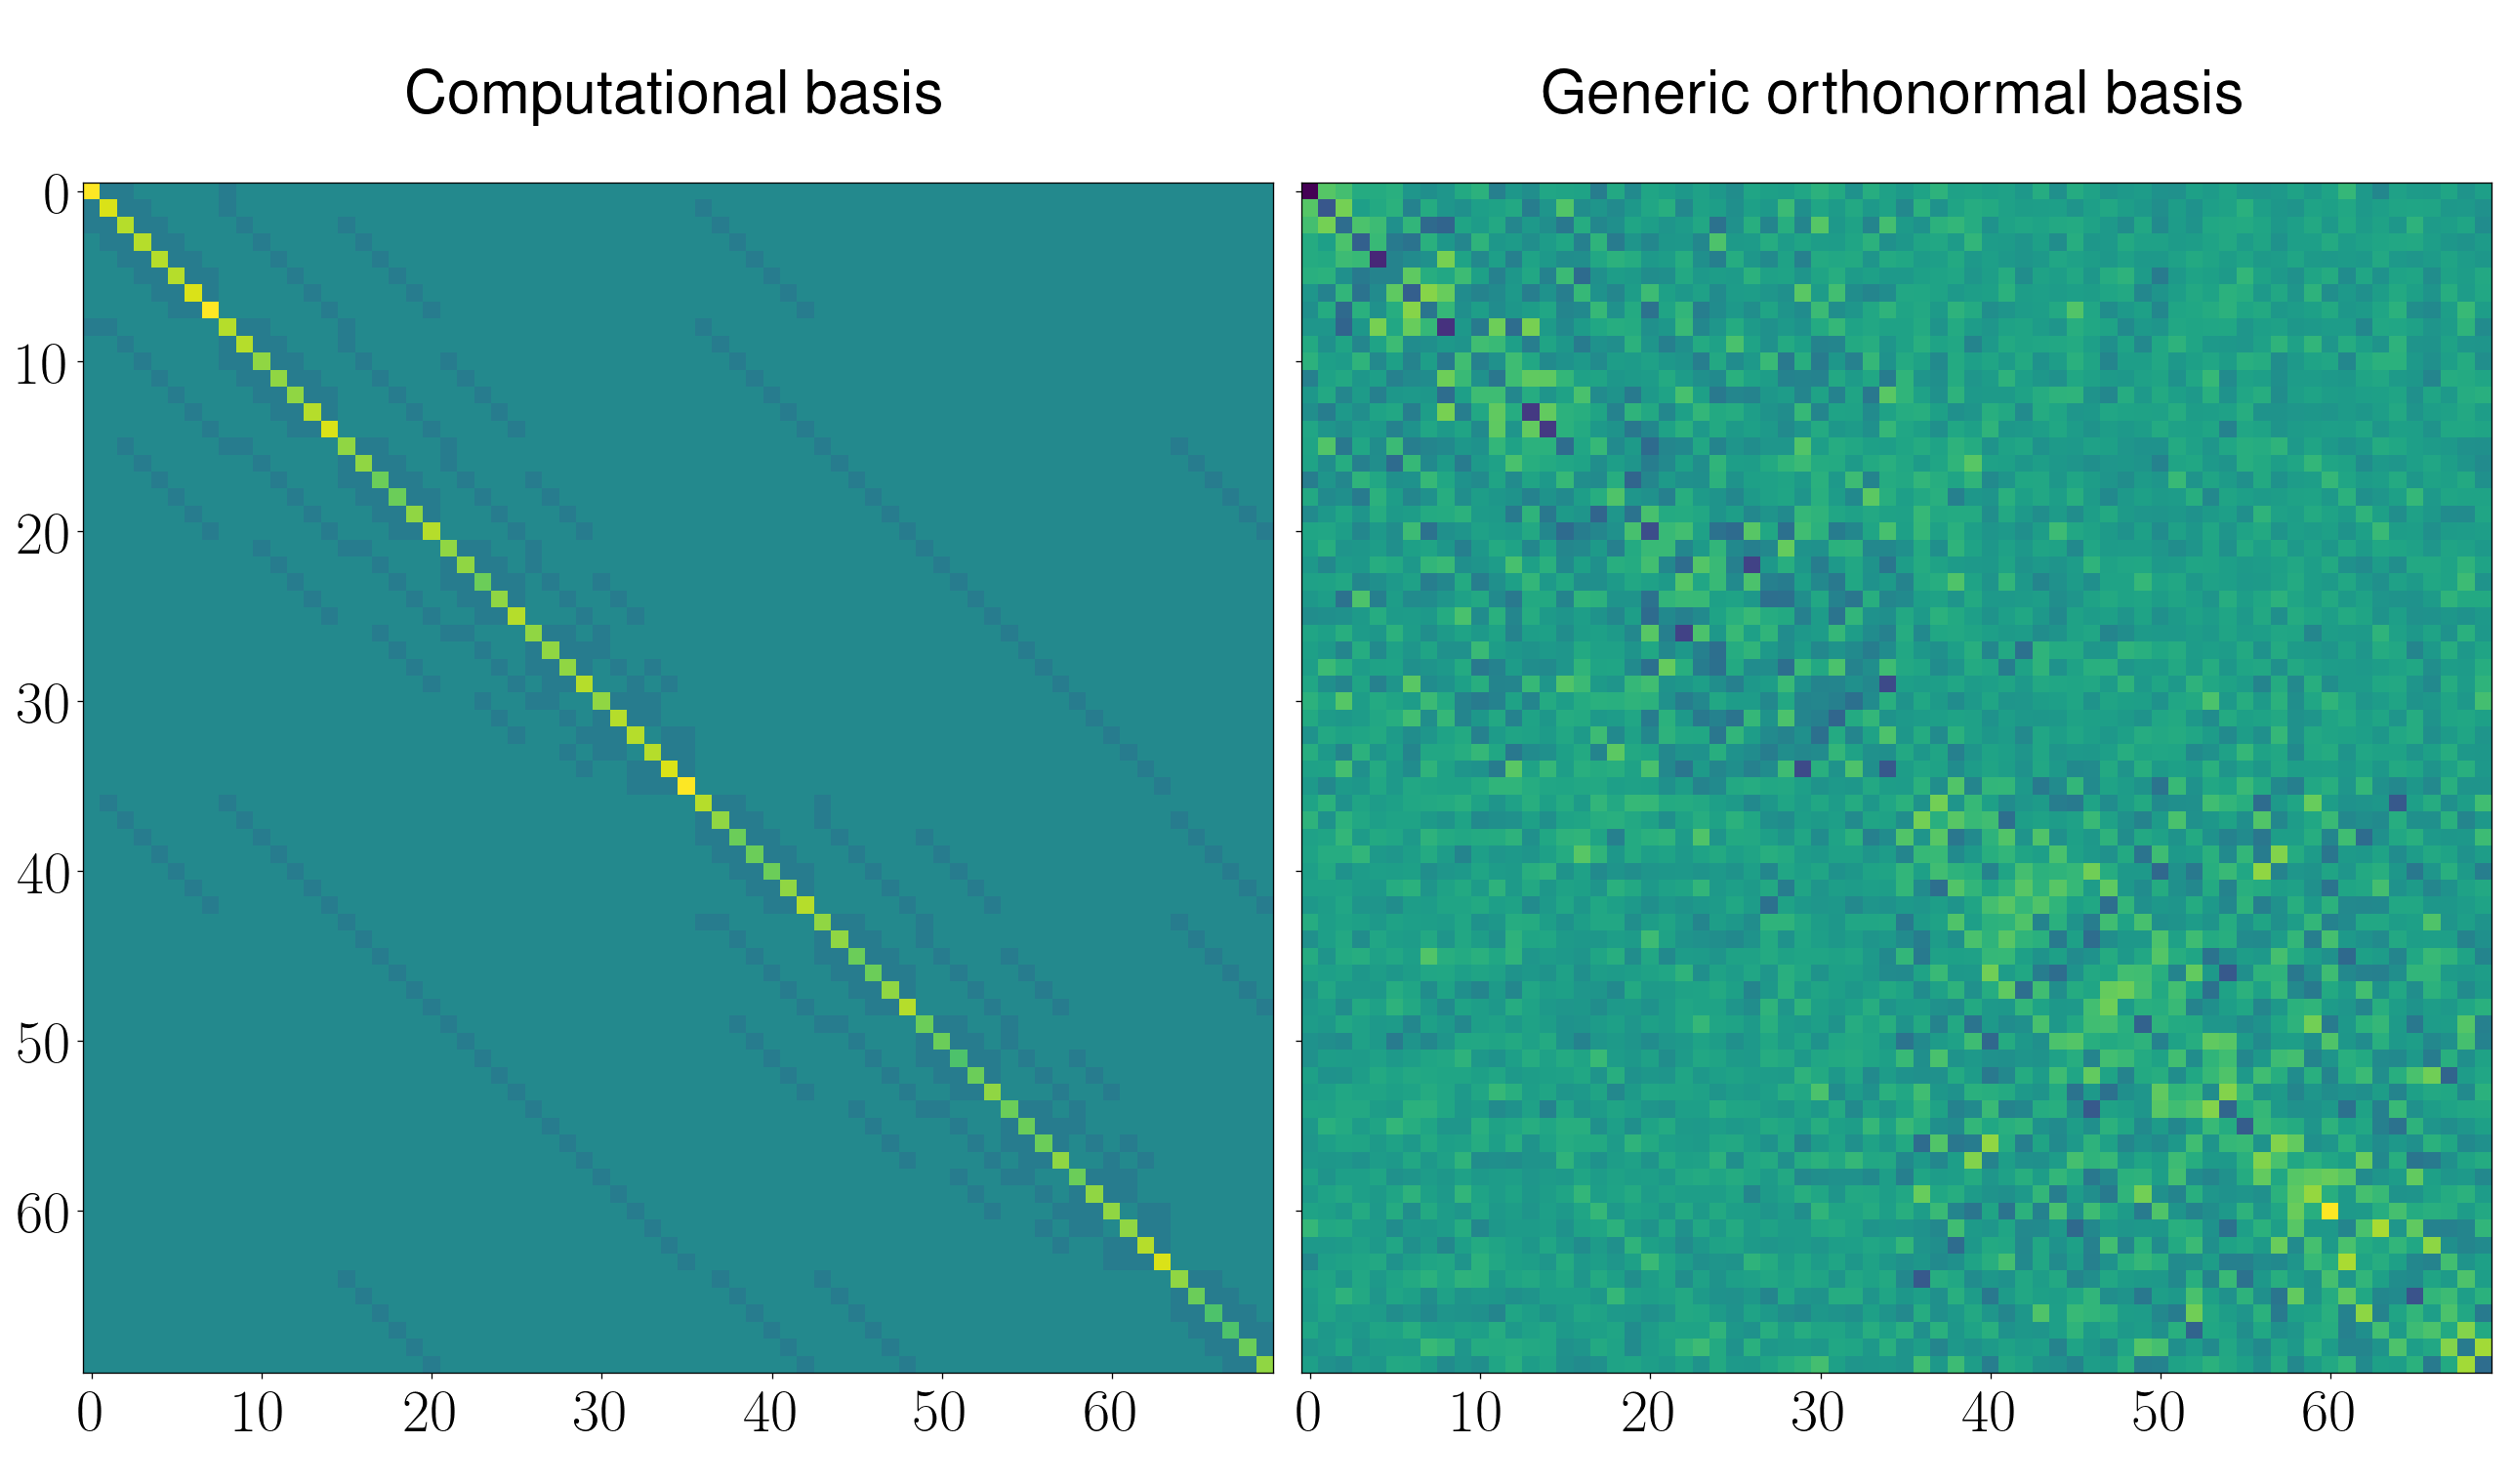

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [91]:
%matplotlib notebook
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
fontsize = [16, 16, 18]
storage_path = '../../MBLExact_data/Data_mbl_erg_paper'
# plot_type = 'mbl_erg_paper_graphs'
plot_type = '../paper1/ArXiv1/figpdf_paper/'


nrows = 1
ncols = 2

fontsize = [34, 38, 38]
graph = pcls.Plotter(nrows, ncols, (22, 13), sharey=True)
[ax1, ax2] = graph.axes.flatten()

ax1.set_title('$\\text{Computational basis}$', fontsize=fontsize[-1], y=1.0)
ax2.set_title('$\\text{Generic orthonormal basis}$', fontsize=fontsize[-1], y=1.0)

ax1.matshow(np.real(ham_sector1.todense()))
ax2.matshow(np.real(ham1_trans))
for ax in [ax1, ax2]:
    pcls.prepare_ax(ax, fontsize=fontsize, grid=False)
    ax.xaxis.set_ticks_position('bottom')

# subfolder = 'SFF_PANELS'
subfolder = '.'
#plot_type = 'Misc_quantities'
# savename = 'SFF_PANEL_FIX_L_SCALE_W{}{}.pdf'.format(size, inset_str)
savename = 'schematic_rnd_finetune.pdf'
graph.prepare_plot(
    savename,
    '.',
    '.',
    subfolder=subfolder,
    save=True,
    save_metadata=False,
    top=0.94)

In [76]:
from spectral_stats.spectra import Spectra, _makehash


Performing spectral unfolding with the following settings: 
n: 6, merge: False, correct_slope: True 
spectral_width: (0.0, 1.0)


<IPython.core.display.Javascript object>


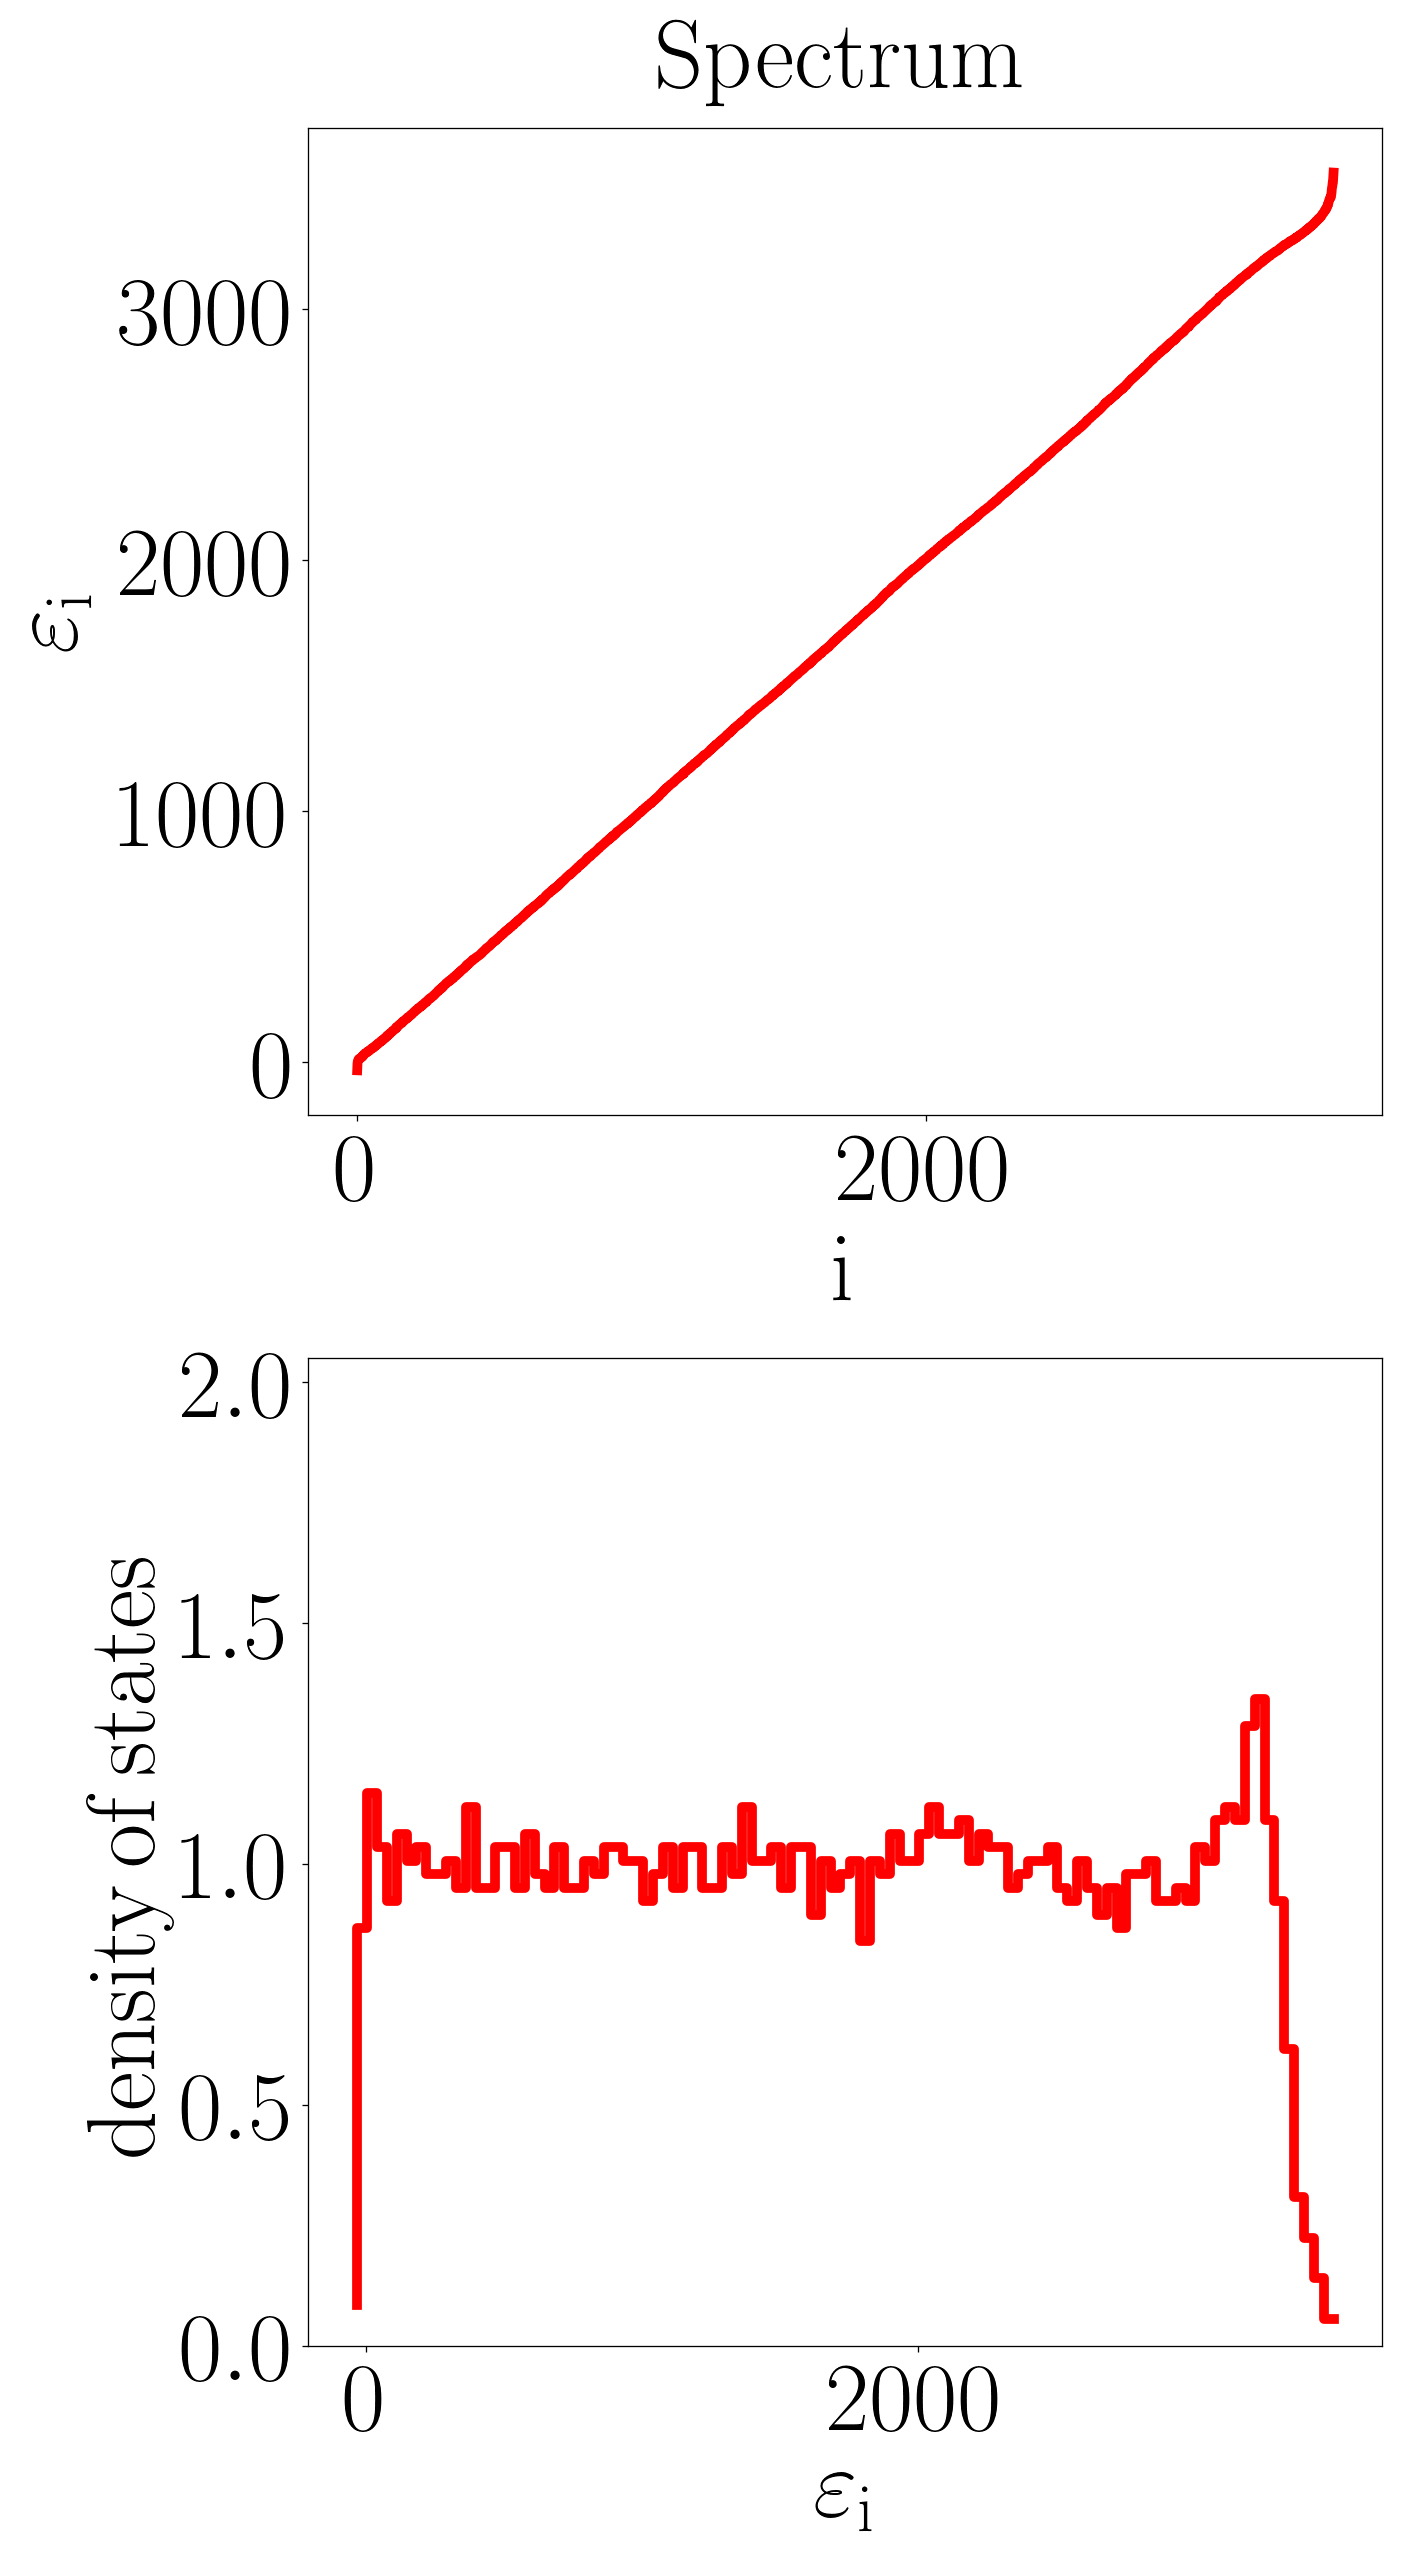

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [178]:
spc = Spectra(eig2);
spc.spectral_width=(0., 1.)
spc.spectral_unfolding(n=6, merge=False, correct_slope=True);
# spc.spectral_resizing()
# fig = plt.figure()
# for spec in spc.spectrum:
#     plt.plot(spec)
hist, edges = spc.hist(bins = 100)
# fig = plt.figure()

# plt.step(edges[:-1], hist*spc.nener)
# plt.show()


nrows = 2
ncols = 1

fontsize = [60, 60, 60]
graph = pcls.Plotter(nrows, ncols, (12, 22), sharex=False, sharey=False)
[ax1, ax2] = graph.axes.flatten()

# ax1.set_title('$E_\\mathrm{n}$', fontsize=fontsize[-1], y=1.0)

for ax in [ax1, ax2]:
    pcls.prepare_ax(ax, fontsize=fontsize, grid=False)
for spec in spc.spectrum:
    ax1.plot(spec, color='red', lw=6)*spc.nener

ax1.set_title('$\mathrm{Spectrum}$', fontsize=fontsize[-1], y=1.03)
ax1.set_xlabel('$\mathrm{i}$', fontsize=fontsize[1])
ax2.set_ylim(0., 2.05)
ax1.set_ylabel('$\\varepsilon_\mathrm{i}$', fontsize=fontsize[1])
ax2.set_xlabel('$\\varepsilon_\mathrm{i}$', fontsize=fontsize[1])
ax2.set_ylabel('$\mathrm{ density \, of \, states}$', fontsize=fontsize[1])

# ax1.set_ylabel('$E_\mathrm{i}$', fontsize=fontsize[1])
# ax2.set_xlabel('$E_\mathrm{i}$', fontsize=fontsize[1])
# ax2.set_ylabel('$\mathrm{normalized \, density \, of \, states}$', fontsize=fontsize[1])
ax2.step(edges[:-1], hist*spc.nener, color='red', lw=6)
# subfolder = 'SFF_PANELS'
subfolder = '.'
#plot_type = 'Misc_quantities'
# savename = 'SFF_PANEL_FIX_L_SCALE_W{}{}.pdf'.format(size, inset_str)
savename = 'schematic_unfolding2.pdf'
graph.prepare_plot(
    savename,
    '.',
    '.',
    subfolder=subfolder,
    save=True,
    save_metadata=False,
    top=0.95)

In [6]:
a = np.arange(1, 10, 1)

In [18]:
np.split(a, [1])

[array([1]), array([2, 3, 4, 5, 6, 7, 8, 9])]

In [19]:
c, d = a[0], a[1:]